In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = load_breast_cancer()

In [4]:
# 지도학습, 학습용 데이터(xTrain, yTrain)와 검증용 데이터(xTest, yTest)를 나누는 과정
# train_test_split: 데이터를 학습용과 테스트 용으로 자동 분할
xTrain, xTest, yTrain, yTest = train_test_split(data.data, data.target
                                                , random_state=42)
# data.data = 입력 데이터, data.target = 출력 데이터, random_state=에 값 배정
# 매번 실행할 때마다 랜덤 시드를 고정
model = DecisionTreeClassifier(criterion="entropy")
# 엔트로피가 낮아질수록 더 순수한 데이터 분할
print("model :", model)
model.fit(xTrain, yTrain)
# 학습 수행


model : DecisionTreeClassifier(criterion='entropy')


DecisionTreeClassifier(criterion='entropy')

In [5]:
# 모델이 예측한 클래스 값들의 배열
yPredict = model.predict(xTest)
print(yPredict)
for pY, pT in zip(yPredict, yTest): # 예측값: 실제 정답 비교, pY=예측값 , pT= 실제 정답 값
    print("[",pY," :",pT,"]") #정답 데이터와 비교

[1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1]
[ 1  : 1 ]
[ 0  : 0 ]
[ 0  : 0 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 0  : 0 ]
[ 0  : 0 ]
[ 0  : 0 ]
[ 0  : 1 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 0  : 0 ]
[ 1  : 1 ]
[ 1  : 0 ]
[ 1  : 1 ]
[ 0  : 0 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 0  : 0 ]
[ 1  : 0 ]
[ 1  : 1 ]
[ 0  : 0 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 0  : 0 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 0  : 0 ]
[ 1  : 1 ]
[ 0  : 0 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 0  : 0 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 0  : 0 ]
[ 0  : 0 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 0  : 0 ]
[ 0  : 0 ]
[ 1  : 1 ]
[ 1  : 1 ]
[ 0  : 0 ]
[ 0  : 0 ]
[ 1  : 1 ]
[ 1  

In [6]:
# 비지도 학습 yTrain의 부재
from sklearn.preprocessing import StandardScaler
print(xTrain)
#scaling =  정규화
scaler = StandardScaler() # z-score로 정규화
scaler.fit(xTrain)
xTrainTrans = scaler.transform(xTrain)
print(xTrainTrans) # 정규화된 학습 데이터(-2~2)
model.fit(xTrainTrans, yTrain) #정규화된 데이터로 모델을 다시 학습
print("-----------------transformation--------------") # 지도학습으로 변환후 비교
# xTest = scaling x, model= 정규화된 데이터로 학습
# 예측 성능이 이상해질 가능성이 높음
# pY vs pT
yPredict = model.predict(xTest) 
for pY, pT in zip(yPredict, yTest):
    print("[",pY," :",pT,"]") 


# 이상치 4개 -> 10개 이상으로 증가


[[1.289e+01 1.312e+01 8.189e+01 ... 5.366e-02 2.309e-01 6.915e-02]
 [1.340e+01 2.052e+01 8.864e+01 ... 2.051e-01 3.585e-01 1.109e-01]
 [1.296e+01 1.829e+01 8.418e+01 ... 6.608e-02 3.207e-01 7.247e-02]
 ...
 [1.429e+01 1.682e+01 9.030e+01 ... 3.333e-02 2.458e-01 6.120e-02]
 [1.398e+01 1.962e+01 9.112e+01 ... 1.827e-01 3.179e-01 1.055e-01]
 [1.218e+01 2.052e+01 7.722e+01 ... 7.431e-02 2.694e-01 6.878e-02]]
[[-0.34913849 -1.43851335 -0.41172595 ... -0.91671059 -0.92508585
  -0.80841115]
 [-0.20468665  0.31264011 -0.13367256 ...  1.43655962  1.14955889
   1.56911143]
 [-0.32931176 -0.21507235 -0.31739376 ... -0.7237126   0.53496977
  -0.61934827]
 ...
 [ 0.04739597 -0.56293662 -0.06529202 ... -1.23262438 -0.68282718
  -1.261137  ]
 [-0.04040808  0.09966199 -0.03151368 ...  1.08847951  0.48944465
   1.26159953]
 [-0.5502381   0.31264011 -0.6040977  ... -0.59582424 -0.29911546
  -0.82948141]]
-----------------transformation--------------
[ 1  : 1 ]
[ 1  : 0 ]
[ 1  : 0 ]
[ 1  : 1 ]
[ 1  : 1 ]

In [7]:
from sklearn.datasets import load_iris
data = load_iris()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [8]:
# iris 데이터의 기술통계량
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
features = pd.DataFrame(data=data.data, columns = data.feature_names)
print(features)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [10]:
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
iris = load_iris()
# iris.rename({
#     "sepal length (cm)":"sepal length",
#     "sepal width (cm)":"sepal width",
#     "petal length (cm)":"petal length",
#     "petal width (cm)":"petal width"
# }, axis =1,  inplace=True)
# iris

In [12]:
target = pd.DataFrame(data.target, columns=['species'])
iris = pd.concat([features, target], axis=1)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
iris['species'] = iris.species.map(lambda x:data.target_names[x])
# 각 원소 x에 대해 함수 실행, x=값 에 따라 target_name을 지정정
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
iris.isna().sum(axis=0)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [15]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
# iris.drop('species', axis=1,inplace=True)
# 모든행, 마지막 열을 제외한 상관관계 표시
iris.iloc[:,:-1].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [18]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

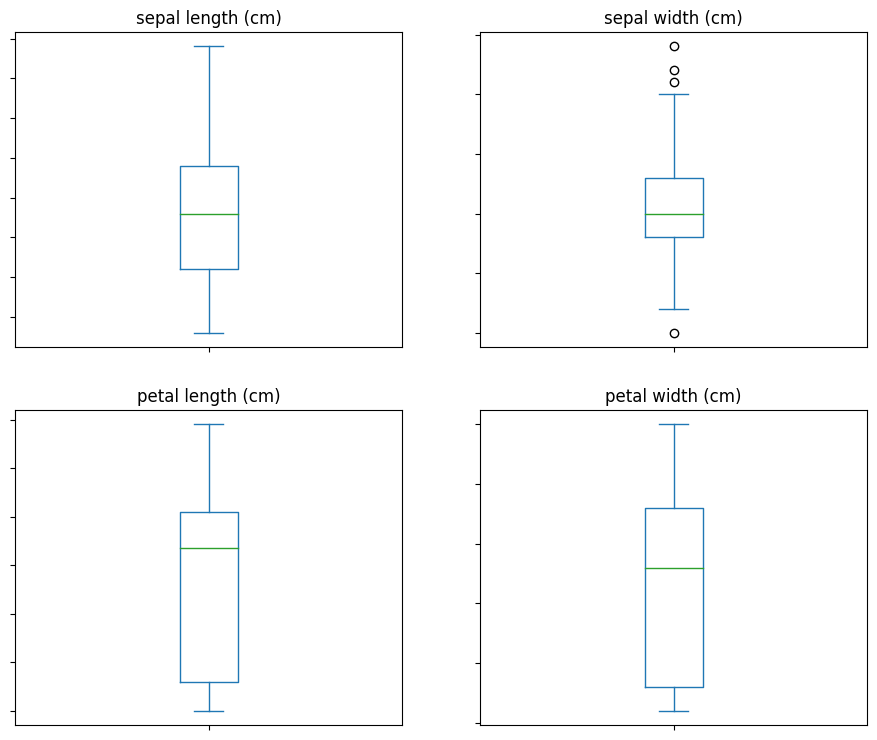

In [19]:
def boxplot_iris(feature_names, dataset):
    i = 1
    plt.figure(figsize=(11,9))
    for col in feature_names:
        # subplot을 2x2 배열 위에 i번째 순서로 배열
        plt.subplot(2,2,i)
        plt.grid(True) # 눈금설정정
        # 눈금 true=보이게, false=안보이게
        plt.tick_params(axis='both', left=True,
                        top=False, right=False,
                        bottom=True, labelleft=False,
                        labeltop=False, labelright=False,
                        labelbottom=False)
        # 종류= 박스, sharex=False : 각 boxplot이 독립적인 x축 스케일을 사용용
        dataset[col].plot(kind='box', subplots=True,
                          sharex=False)
        plt.title(col)
        i+=1 # subplot index 증가
    plt.show()
    
boxplot_iris(iris.columns[:-1], iris)

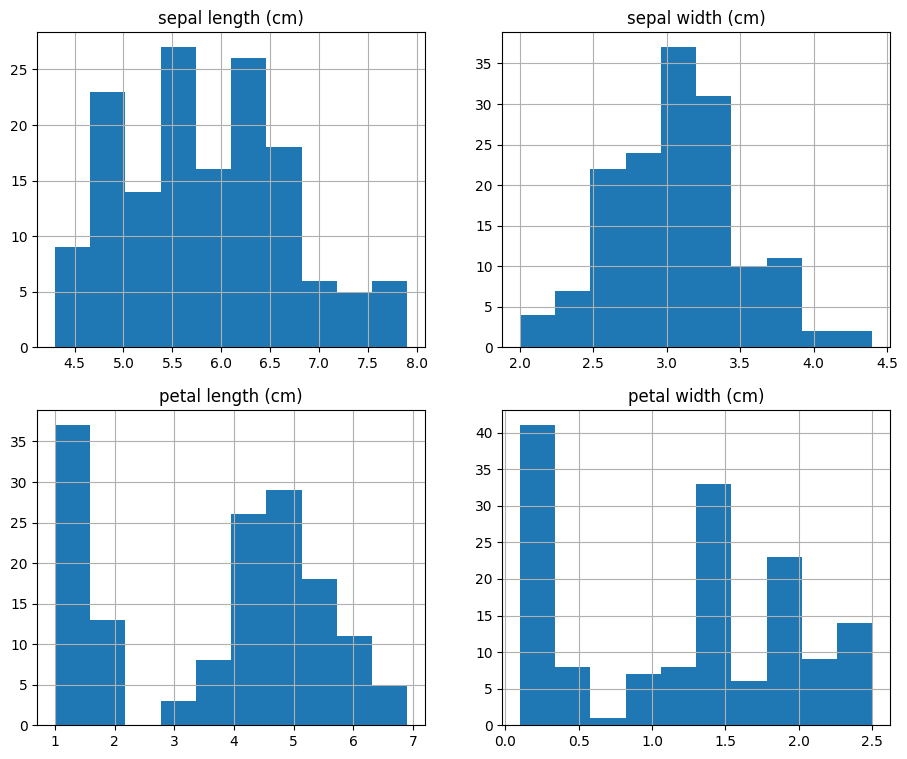

In [20]:
def histogram_iris(feature_names, dataset):
    i = 1
    plt.figure(figsize=(11,9))
    for col in feature_names:
        # subplot을 2x2 배열 위에 i번째 순서로 배열
        plt.subplot(2,2,i)
        plt.grid(True)
        # 눈금 true=보이게, false=안보이게
        # plt.tick_params(axis='both', left=True,
        #                 top=False, right=False,
        #                 bottom=True, labelleft=False,
        #                 labeltop=False, labelright=False,
        #                 labelbottom=False)
        dataset[col].hist()
        plt.title(col)
        i+=1
    plt.show()
    
histogram_iris(iris.columns[:-1], iris)

In [21]:
# 정규분포 가능성 있는 것은 없음
# 편향이 어디로 되어있는지 생각해볼만 함
# 범위와 분산이 보임
# 빈도 집중값을 유의깊게 봐야함
# 한쪽 끝의 낮은 빈도의 단독 막대가 있다면 = 이상치
### species가 세 종류이기에 세 갈래로 분포된 히스토그램이 좋은 예상치 일 것 ###
### petal length = 세 개의 뚜렷한 구간, sepal width = 정규분포형 ###

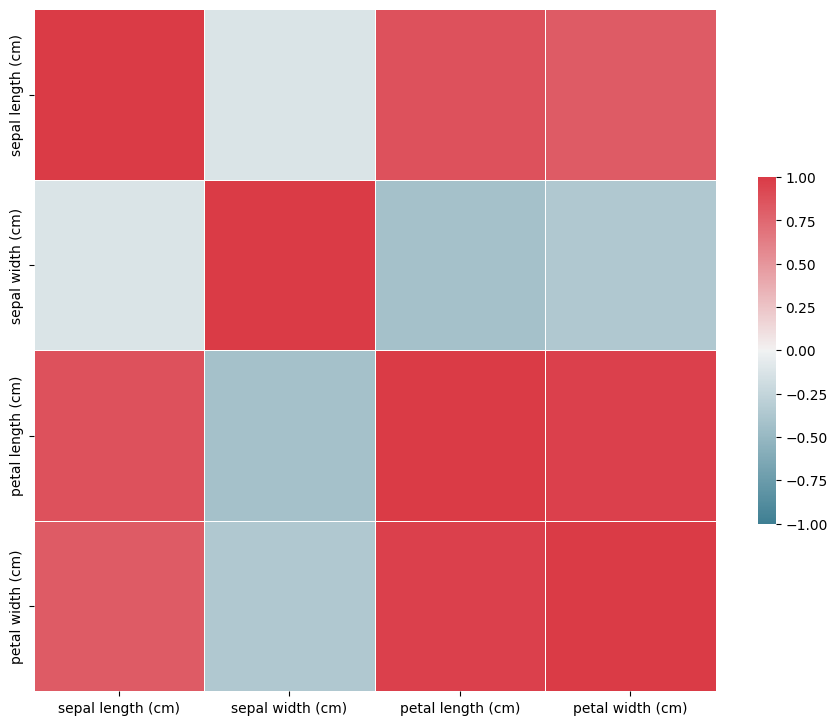

In [22]:
iris1 = iris.drop(columns='species', axis=1)
corr = iris1.corr() #피어슨 상관계수
cmap =sns.diverging_palette(220,10, as_cmap=True) # 양의 상관(밝은색)~음의 상관(어두운 색색)
plt.figure(figsize=(11,9))
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, square=True, linewidths=.5, cbar_kws={'shrink':0.5})
# vmax, vmin 은 상관관계에 따른 색의 밝기, 진하기를 나타냄
# cbar_kws : color bar 그리기 및 컬러바의 크기기
plt.show()



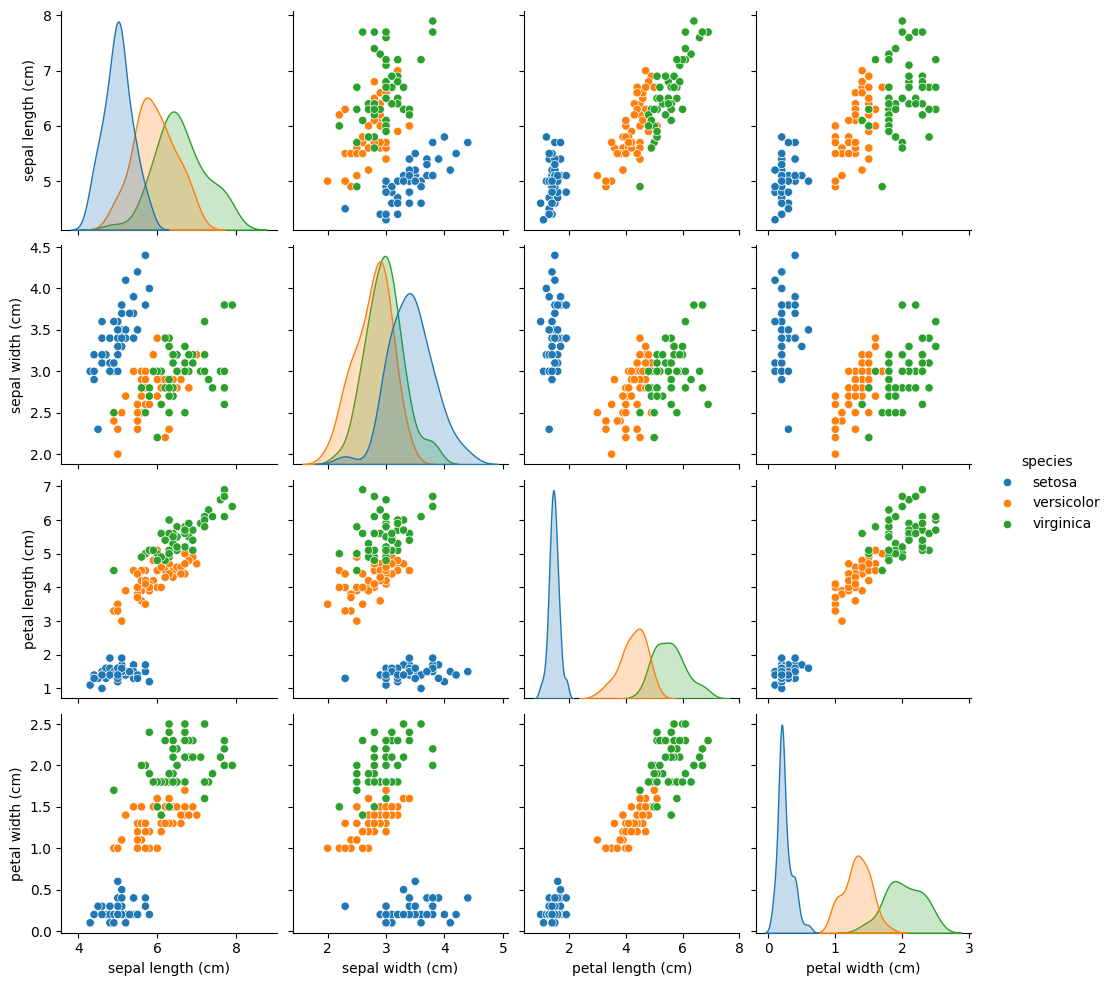

In [23]:
sns.pairplot(iris, hue='species')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
    iris.iloc[:,:-1], iris.iloc[:,-1], test_size=0.2,
    random_state=42, shuffle=True
)
yTest.describe

<bound method NDFrame.describe of 73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virginica
108     virginica
143     virginica
45         setosa
30         setosa
Name: species, dtype: object>

In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    criterion='gini', splitter='best',
    max_depth=None, min_samples_split=2,
    min_samples_leaf=1, min_weight_fraction_leaf= 0.0,
    max_features=None, random_state=42,
    max_leaf_nodes=None, min_impurity_decrease=0.0
)

print(model)

DecisionTreeClassifier(random_state=42)


In [26]:
model.fit(xTrain, yTrain)
# 150 샘플 -> 100개 학습

DecisionTreeClassifier(random_state=42)

In [27]:
model.score(xTest, yTest)
# 50개로 검증, 1개 틀림 =>98%, 과적합 가능성 있음

1.0

In [28]:

# 과제>iris 데이터 : (sepal length, sepal width, petal length, petal width)
# =                     5.0             3.7          7.3            2.1
# -> 품종 맞추기 : 안 맞았을 경우 pair plot을 놓고 여집합 위치에서 
# 데이터를 10개 뽑아서 테스트하고
# 실제 정확도를 체크해 본다.

In [29]:
# 교차 검증을 수행, 모델 평가 점수를 리턴
from sklearn.model_selection import cross_val_score, KFold
# 데이터가 10개 부분집합으로 나누는 kfold 객체 생성
cv= KFold(n_splits=10, shuffle=True, random_state=42)

# 결과= 각 항목에 대한 점수
results = cross_val_score(model, xTrain, yTrain, cv=cv)
# 10번 교차검증에 대한 정확도 평균 계산
fin_result = np.mean(results)

for i, _ in enumerate(results):
    print("{}번째 교차검증 정확도: {}".format(i,_))
print("\n교차검증 최종 정확도: {}".format(fin_result))

0번째 교차검증 정확도: 0.8333333333333334
1번째 교차검증 정확도: 1.0
2번째 교차검증 정확도: 1.0
3번째 교차검증 정확도: 1.0
4번째 교차검증 정확도: 0.8333333333333334
5번째 교차검증 정확도: 1.0
6번째 교차검증 정확도: 0.8333333333333334
7번째 교차검증 정확도: 0.8333333333333334
8번째 교차검증 정확도: 1.0
9번째 교차검증 정확도: 1.0

교차검증 최종 정확도: 0.9333333333333333


In [30]:
# stratifiedkfold를 사용, 분포를 각 fold에 균등하게 유지, 불균형 데이터셋에서도
# 신뢰할 만한 평가가 가능 => 정확도(=성능 향상)를 높일 수 있음
from sklearn.model_selection import StratifiedKFold

cv1 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(model, xTrain, yTrain, cv=cv1)
fin_result1 = np.mean(results)

for i, _ in enumerate(results):
    print("{}번째 교차검증 정확도: {}".format(i,_))
print("\n교차검증 최종 정확도: {}".format(fin_result1))


0번째 교차검증 정확도: 0.9166666666666666
1번째 교차검증 정확도: 1.0
2번째 교차검증 정확도: 1.0
3번째 교차검증 정확도: 0.9166666666666666
4번째 교차검증 정확도: 0.9166666666666666
5번째 교차검증 정확도: 0.8333333333333334
6번째 교차검증 정확도: 1.0
7번째 교차검증 정확도: 1.0
8번째 교차검증 정확도: 0.9166666666666666
9번째 교차검증 정확도: 0.8333333333333334

교차검증 최종 정확도: 0.9333333333333333


In [31]:
import scikitplot as skplt 

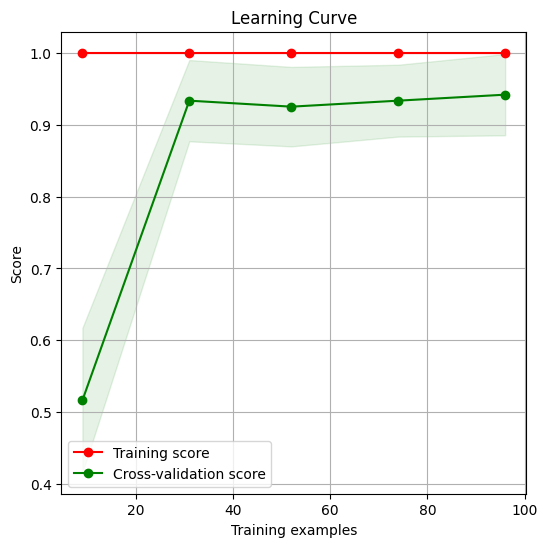

In [32]:
# 학습 곡선 = 모델이 적절한 학습 정도(과소,과대 적합 판단)를 판단
# 훈련 점수 > 검증 점수 -> 과적합
# 두 점수가 적절하면 -> 적절,       두 점수가 모두 낮으면 -> 과소적합
skplt.estimators.plot_learning_curve(model, xTrain, yTrain, figsize=(6,6))
plt.show()

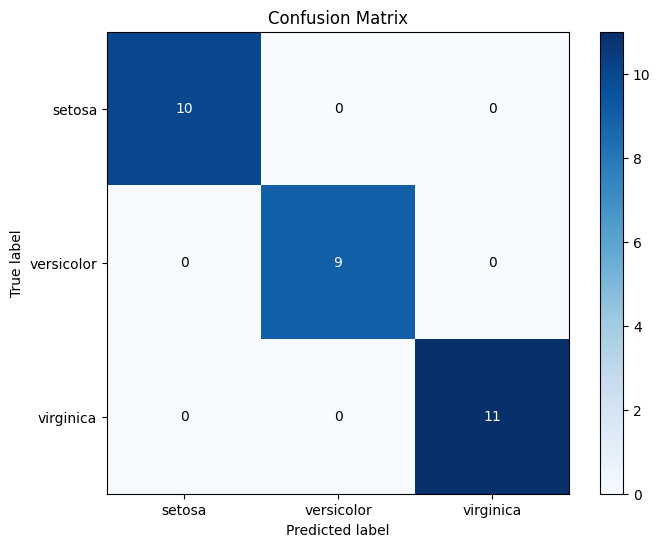

In [33]:
pred = model.predict(xTest)
skplt.metrics.plot_confusion_matrix(yTest, pred, figsize=(8,6))
plt.show()

In [34]:
# 그리드 탐색 및 교차검증
# (하이퍼 파라미터 튜닝 - 기계가 찾지 못해 사람이 직접 지정해야 하는 파라미터)
from sklearn.model_selection import GridSearchCV
estimator = DecisionTreeClassifier()
Parameters = {
    "criterion": ['gini', 'entropy'], # 분할 기준
    "splitter": ['best', 'random'], # 분할 방법
    "max_depth": [4,6,8,10,12], # 트리 최대 깊이
    "min_weight_fraction_leaf" : [0.0,0.1,0.2,0.3], #리프 노드 최소 가중치 비율
    "random_state": [7,23,42,8,142], # 랜덤 시드(결과 재현성)
    "min_impurity_decrease": [0.0,0.05,0.1,0.2] #불순도 감소 임계치(분할 기준)
}
model =GridSearchCV(estimator=estimator, param_grid=Parameters,
                    cv =cv1, verbose =1, n_jobs = -1, refit=True)
# cv=cv1 : stratifiedkfold 교차검증 사용(이전에 사용한)
# verbose=1 : 진행상황 출력
# n_jobs=-1 : CPU를 사용하여 병렬 처리
# refit=True : 최적 파라미터로 모델 재학습
model.fit(xTrain, yTrain)
print("Best Estimator: \n", model.best_estimator_)  # 최적 모델 객체 출력
print("\nBest Params: \n", model.best_params_) # 최적 하이퍼파라미터 값 출력
print("\nBest Score: \n", model.best_score_) # 최적 교차검증 점수 출력

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits
Best Estimator: 
 DecisionTreeClassifier(max_depth=6, random_state=7, splitter='random')

Best Params: 
 {'criterion': 'gini', 'max_depth': 6, 'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.0, 'random_state': 7, 'splitter': 'random'}

Best Score: 
 0.95


In [35]:
# 과제 > 아래의 모델을 사용하여 성능을 체크
# KFold를 사용할 경우
model = DecisionTreeClassifier(
    criterion='entropy', splitter='random', max_depth=6, random_state=7
)
model.fit(xTrain, yTrain)
print("Gscv model score :", model.score(xTest, yTest))

Gscv model score : 0.9666666666666667


In [36]:
# precision 점수 = TP/(TP+FP)
from sklearn.metrics import precision_score

precisions = precision_score(yTest, model.predict(xTest), average=None)
# average 기본 값은 binary(이진)
# 다중 분류일 경우 average=

for target, score in zip(data.target_names, precisions):
    print(f"{target}의 정밀도: {score}")

setosa의 정밀도: 1.0
versicolor의 정밀도: 1.0
virginica의 정밀도: 0.9166666666666666


In [37]:
# recall 점수 = TP/(TP+FN)
from sklearn.metrics import recall_score

recalls = recall_score(yTest, model.predict(xTest), average=None)
# average 기본 값은 binary(이진)
# 다중 분류일 경우 average=

for target, score in zip(data.target_names, recalls):
    print(f"{target}의 재현율율: {score}")

setosa의 재현율율: 1.0
versicolor의 재현율율: 0.8888888888888888
virginica의 재현율율: 1.0


In [38]:
from sklearn.metrics import fbeta_score, f1_score

# 다중 분류일 경우 average != 'binary'
fbetas = fbeta_score(yTest, model.predict(xTest), beta=1, average=None)

for target, scroe in zip(data.target_names, fbetas):
    print(f"{target}의 f점수(beta=1): {score}")
    
print("======================================")
# 다중 분류일 경우 average != 'binary'
f1s = f1_score(yTest, model.predict(xTest), average=None)

setosa의 f점수(beta=1): 1.0
versicolor의 f점수(beta=1): 1.0
virginica의 f점수(beta=1): 1.0
